In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

In [2]:
df = pd.read_csv('./data/EPL 19-20 player statistics.csv')
df.head()

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,...,expected_goals_conceded,expected_goals_nonpenalty_conceded,expected_goalsontarget,expected_goalsontarget_nonpenalty,expected_goalsontarget_freekick,expected_goalsontarget_conceded,expected_goalsontarget_nonpenalty_conceded,expected_assists,expected_assists_setplay,expected_assists_openplay
0,95658,Defender,Harry Maguire,27.2,1,Manchester United,Right,26,8,6,...,30.192347,29.403946,0.8307,0.8307,0.0,28.6243,27.7321,0.690133,0.003734,0.686398
1,51940,Goalkeeper,David de Gea,29.5,1,Manchester United,Right,0,0,0,...,30.192347,29.403946,0.0000,0.0000,0.0,28.6243,27.7321,0.006479,0.000458,0.006021
2,184667,Defender,Victor Lindelöf,25.8,1,Manchester United,Right,5,1,1,...,27.870346,27.081946,0.8769,0.8769,0.0,27.1273,26.2351,0.454670,0.000577,0.454093
3,214590,Defender,Aaron Wan-Bissaka,22.5,1,Manchester United,Right,5,1,1,...,26.840237,26.051837,0.1334,0.1334,0.0,25.4245,24.5323,2.663096,0.013549,2.649548
4,200617,Midfielder,Daniel James,22.5,1,Manchester United,Right,39,18,10,...,24.940726,24.152326,4.6795,4.6795,0.0,25.1390,24.2468,2.551592,0.053487,2.498105


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

/Users/ollinj01/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


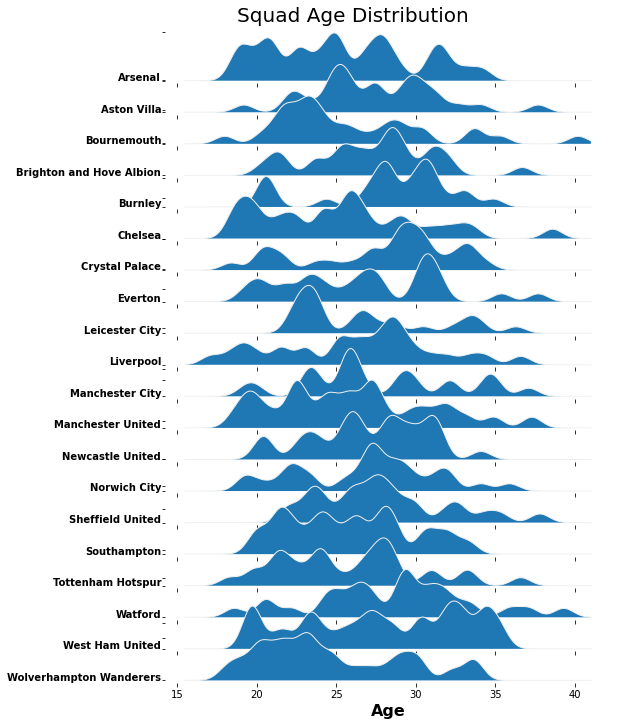

In [26]:
teams = [x for x in np.unique(df.team)]

gs = grid_spec.GridSpec(len(teams),1)
fig = plt.figure(figsize=(8,12))

i = 0

ax_objs = []
for team in teams:
    team = teams[i]
    x = np.array(df[df.team == team].age)
    x_d = np.linspace(15.5,41, 1000)

    kde = KernelDensity(bandwidth=0.6, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, :]))

    # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_ylabel('')

#     # remove borders, axis ticks, and labels
#     ax_objs[-1].set_yticklabels([])

    if i == len(teams)-1:
        ax_objs[-1].set_xlabel("Age", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_country = team.replace(" "," ")
    ax_objs[-1].text(14,0,adj_country,fontweight="bold",fontsize=10,ha="right")


    i += 1

gs.update(hspace=-0.4)

fig.text(0.25,0.89,"Squad Age Distribution",fontsize=20)

plt.tight_layout()
plt.show()

In [27]:
mask = (df.mins_played > 1000) 
df1 = df.loc[mask]
df1.head(3)

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [28]:
df1 = df1.sort_values('age', ascending = False)

In [1]:
# teams = [x for x in np.unique(df1.team)]
teams = ['Arsenal',
         'Watford',
         'Burnley',
         'West Ham United',
         'Norwich City',
         'Aston Villa',
         'Manchester City',
         'Chelsea',
         'Leicester City',
         'Wolverhampton Wanderers',
         'Everton',
         'Sheffield United',
         'Tottenham Hotspur',
         'Brighton and Hove Albion',
         'Southampton',
         'Newcastle United',
         'Bournemouth',
         'Manchester United',
         'Liverpool',
         'Crystal Palace']
    
    
csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

# plt.title('title',**csfont)
# plt.xlabel('xlabel', **hfont)



colors = ['white', '#FDEDEC', '#FDEDEC', '#FADBD8', '#FADBD8', '#F5B7B1', '#F5B7B1', '#F1948A', '#F1948A','#EC7063',
          '#EC7063', '#E74C3C', '#E74C3C', '#CB4335', '#CB4335', '#B03A2E', '#B03A2E', '#943126', '#943126', '#78281F']

gs = grid_spec.GridSpec(len(teams),1)
# fig = plt.figure(figsize=(8,12))
fig = plt.figure(figsize=(8,10))

ax = fig.add_subplot(111)
plt.box(False)             #add this line
plt.tick_params(color="#181818")  #add this line

xt = [19.3,24.5,30,35]
xlabels = [20,25,30,35]
ax.set_xticks(xt)
ax.set_xticklabels(xlabels,color="white", **csfont)
ax.set_xlim(15,41)
ax.set_xlabel("Player Age",fontsize=14,fontweight="bold",color="white",**csfont)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='#181818')
fig.set_facecolor("#181818")

i = 0

ax_objs = []
for team in teams:
    team = teams[i]
    x = np.array(df1[df1.team == team].age)
    x_d = np.linspace(17,39.5, 1000)

    kde = KernelDensity(bandwidth=0.6, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, :]))

    # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#181818",lw=1)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1, color=colors[i])

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
#     ax_objs[-1].set_yticklabels([])
#     ax_objs[-1].set_ylabel('')
#     ax_objs[-1].set_xticklabels([])
#     ax_objs[-1].set_xlabel('')


    if i == len(teams)-1:
        ax_objs[-1].set_xlabel("Player Age", fontsize=16,fontweight="bold", color="white",**csfont)
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_country = team.replace(" "," ")
    ax_objs[-1].text(16.2,0,adj_country,fontweight="bold",fontsize=11,ha="right", color="white",**csfont)
    
    plt.axis('off')

    i += 1

gs.update(hspace=-0.4)


fig.text(0,1.02,"Squad Age Distribution",fontsize=20, color="white",**csfont, fontweight='bold')
fig.text(0,1.00,"English Premier League | Season 2019/2020",fontsize=12, color="white", **csfont)
# fig.text(0,1.02,"Squad Age Distribution",fontsize=20, color="white", fontweight='bold')
fig.text(0.8,1.02, "@jonollington",fontsize=12, color="white",**csfont, fontweight="bold")
# fig.text(0.72,1.00,"Inspired by @petermckeever",color="white",fontsize=10, **csfont)
fig.text(0.72,0.00,"$*played\ at\ least\ 1,000 \ minutes$",color="white",fontsize=10, **csfont)
bg = "#181818"
plt.tight_layout()
plt.savefig("Squad Age Distribution",facecolor=bg,bbox_inches="tight")
plt.show()

NameError: name 'grid_spec' is not defined

In [14]:
df1.groupby('team')['age'].min().sort_values()

team
Arsenal                     18.7
Norwich City                20.4
Chelsea                     20.4
Burnley                     20.5
West Ham United             21.3
Liverpool                   21.6
Brighton and Hove Albion    21.7
Everton                     21.9
Bournemouth                 22.0
Aston Villa                 22.0
Watford                     22.2
Leicester City              22.4
Manchester United           22.5
Newcastle United            22.5
Manchester City             23.1
Sheffield United            23.2
Wolverhampton Wanderers     23.2
Tottenham Hotspur           23.9
Southampton                 24.1
Crystal Palace              27.5
Name: age, dtype: float64

In [15]:
df1.groupby('team').age.agg(['mean', 'min', 'max'])

,mean,min,max
team,,,
Arsenal,26.878571,18.7,33.1
Aston Villa,25.569231,22.0,34.1
Bournemouth,25.578571,22.0,29.1
Brighton and Hove Albion,27.438462,21.7,30.9
Burnley,29.300000,20.5,34.9
Chelsea,25.513333,20.4,31.8
Crystal Palace,30.591667,27.5,34.4
Everton,26.975000,21.9,31.6
Leicester City,26.581818,22.4,33.5


In [16]:
result = df1.groupby('team')['age'].agg(['max','min'])
result['diff'] = result['max']-result['min']

In [17]:
result.head()

,max,min,diff
team,,,
Arsenal,33.1,18.7,14.4
Aston Villa,34.1,22.0,12.1
Bournemouth,29.1,22.0,7.1
Brighton and Hove Albion,30.9,21.7,9.2
Burnley,34.9,20.5,14.4


In [18]:
result.sort_values('diff', ascending=False)

,max,min,diff
team,,,
Watford,37.1,22.2,14.9
Arsenal,33.1,18.7,14.4
Burnley,34.9,20.5,14.4
West Ham United,35.1,21.3,13.8
Norwich City,34.1,20.4,13.7
Aston Villa,34.1,22.0,12.1
Manchester City,35.0,23.1,11.9
Chelsea,31.8,20.4,11.4
Leicester City,33.5,22.4,11.1


In [19]:
arse = df1.groupby('team')['age'].agg(['max','min'])

df['team'] == 'Arsenal'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [20]:
mask = (df.team == 'Arsenal') 
df1 = df.loc[mask]
df1

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled